<a href="https://colab.research.google.com/github/miriampf/07MBIG-Visualizacion-Actividades-Guiadas/blob/master/07MBIG_AG3_Miriam_Perez_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG3 Visualización de datos

In [0]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [0]:
#Cargamos el data set de los pasajeros del Titanic
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
#Informacion del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [0]:
#Renombra la columna class a clase
titanic.rename(columns={'class': 'clase'},
inplace=True)

In [5]:
#Muestra los valores distintos para class(clase)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [6]:
#Primeras 5 filas
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#Añadimos nuevas columnas: is_old, is_baby
###############################################
def is_old_func(row):
 return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [8]:
#Otra forma de definir una nueva columna
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [11]:
#Consulta con condiciones
titanic[
 (titanic.sex == 'female')
 & (titanic['clase'].isin(['First','Third']))
 & (titanic.age > 45 )
 & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


### Gráficos con Seaborn

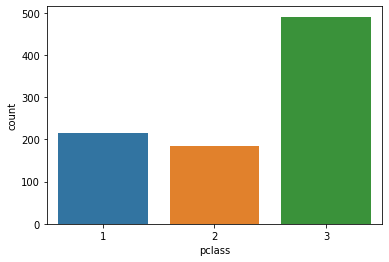

In [12]:
#Distribución de las clases
sns.countplot(x="pclass", data=titanic)

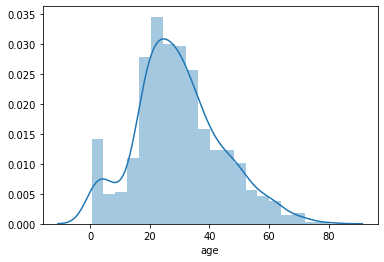

In [13]:
#Distribución de la edad(ege)
sns.distplot(titanic.age.dropna( ))
plt.show( )

### Diagrama "Caja y bigotes" o Boxplot

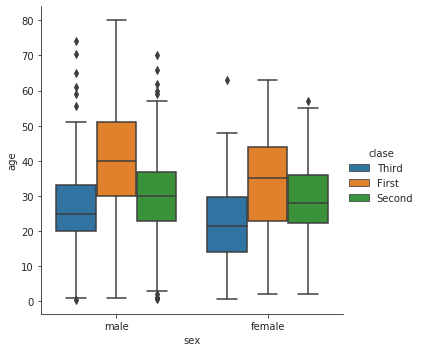

In [14]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
 ax = sns.catplot("sex", "age", "clase" ,
data=titanic, kind="box")

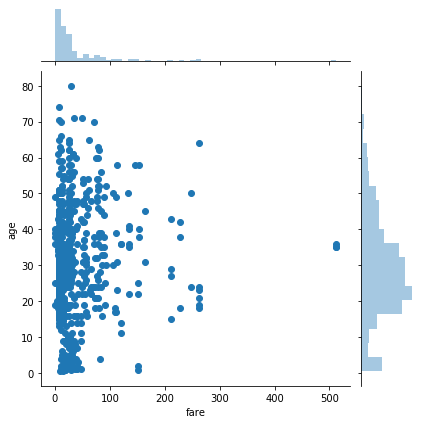

In [16]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='fare',y='age',data=titanic)

### Distribución de la edad en función de la clase y supervivencia

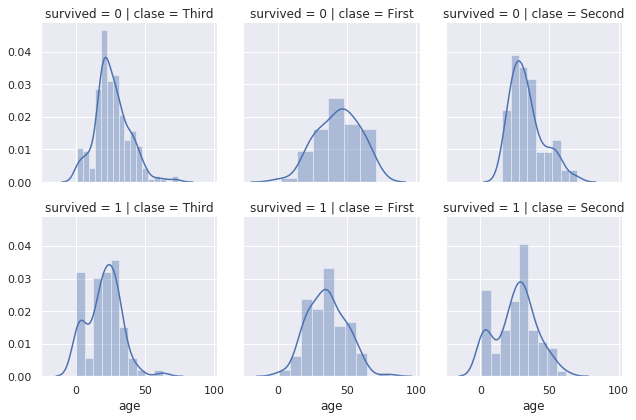

In [21]:
#Cambiamos el font
sns.set(font_scale=1)
g = sns.FacetGrid(titanic, row='survived',
col='clase')
g.map(sns.distplot, "age")
plt.show()

### Distribución de la edad según las categorías de supervivencia y clase

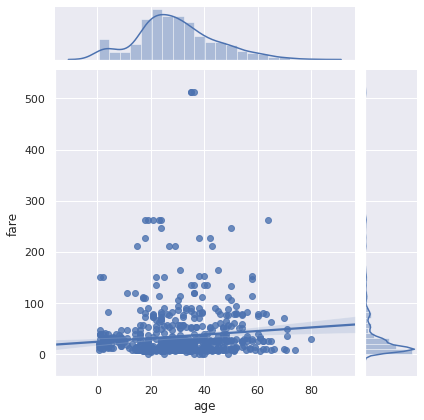

In [24]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='fare',
kind='reg', color='b')
plt.show()

## Matriz de correlación

Text(0.5, 1, 'titanic.corr()')

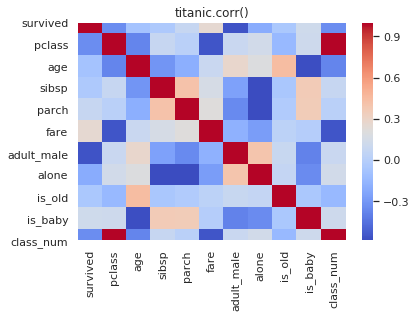

In [25]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

###Diagramas de dispersión de parejas de variables cuantitativas

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


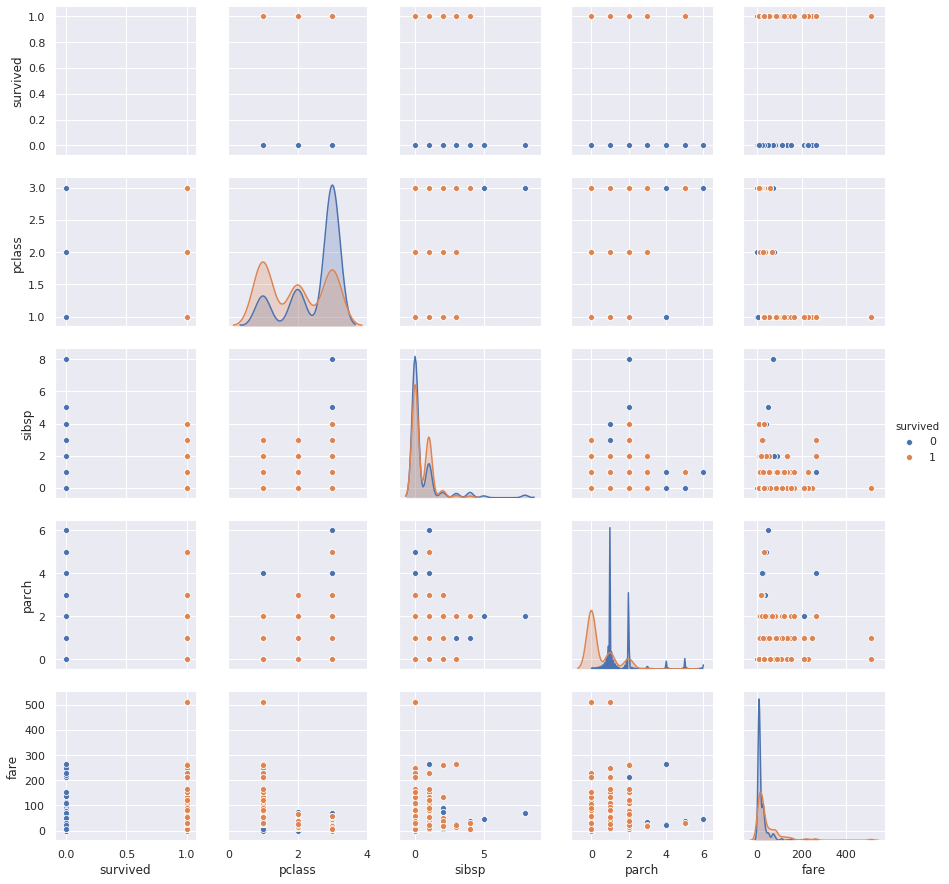

In [28]:
# Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','fare']]

# Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

###Diagramas de dispersión de parejas de variables cuantitativas Dataset: iris

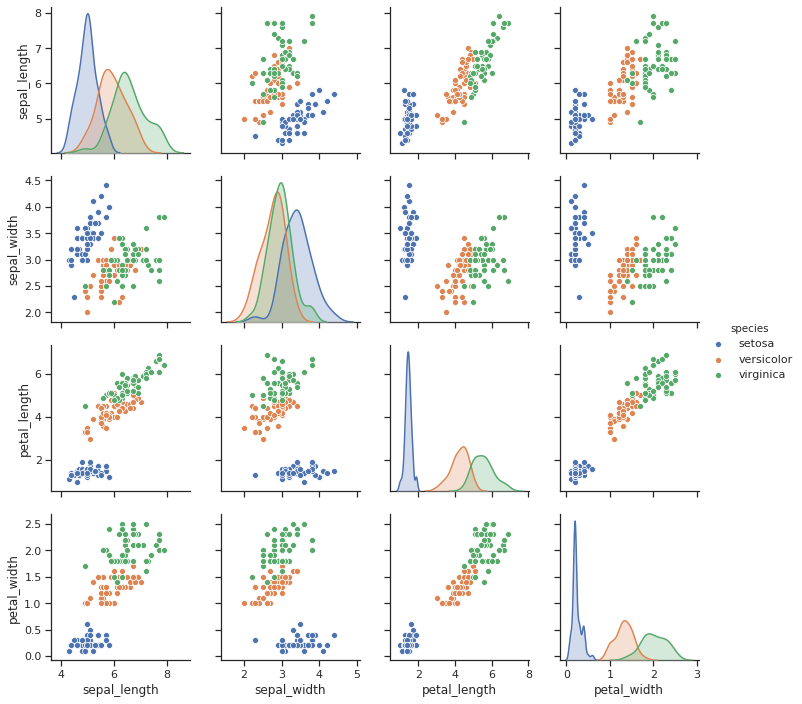

In [29]:
# Establece el estilo estético de las tramas
sns.set(style="ticks")

# Carga el data set
df = sns.load_dataset("iris")

# Matriz de diagramas de dispersion
sns.pairplot(df, hue="species")